Comparison of  Best Customers from Ehsan and me
=========

Igor Marfin <igor.marfin@unister.de> 


-----------


The aim of this work is to compare the obtained lists



## Initialization

---------------------------------


One needs to *import* properly defined modules to make this analysis.  First, we would like to make automatic
numbering the sections.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


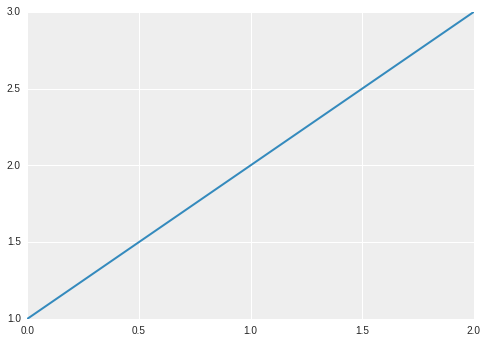

In [1]:
import sys
sys.path = ['/usr/local/lib/python2.7/dist-packages'] + sys.path # to fix the problem with numpy: this replaces  1.6 version by 1.9

%matplotlib inline
%pylab inline

import numpy as np

import os
import matplotlib 
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl


# a plotter module
import seaborn as  sns # seaborn to make a nice plots of the data
import pandas as pd

from Dataframe import Dataframe

# Imputer
import DataFrameImputer # my own imputer

# Transformers
import Normalizer # my own transformer
from sklearn import preprocessing # a set of transformers from sklearn

# To create Pipelines of the transformers
from sklearn.pipeline import Pipeline,FeatureUnion
from TransformWrapper import TransformWrapperLambda, TransformWrapperTransformer

# use a nice style for plots and the notebook

import json
s = json.load( open("styles/my_matplotlibrc.json") )
matplotlib.rcParams.update(s)

from IPython.core.display import HTML
from IPython.display import display, Math, Latex
import urllib2


def css_styling():
    styles = open("styles/custom_v3.css", "r").read()
    return HTML(styles)
css_styling()

#HTML( urllib2.urlopen('http://bit.ly/1Bf5Hft').read() )



prefix='HR_predictive_'
plots_dir = 'plots/'

ion()

# test plotting style'
from pylab import *
plot([1,2,3])
show()


import warnings
warnings.filterwarnings("ignore", category=UserWarning)



## Let's read data ...

In [25]:
data_dir = 'data/'
best_customers_Ehsan = 'HR_Selection_100000_150526.csv'
best_customers_Igor = 'predicted_merged.csv'
test_data = 'Nur_HR_Kunden_150518.csv'

data_Ehsan = pd.read_csv(data_dir+best_customers_Ehsan,na_values=[' ',''],keep_default_na = True,sep=",")
data_Igor = pd.read_csv(data_dir+best_customers_Igor,na_values=[' ',''],keep_default_na = True,sep=",")

Let's compare first 10 entries ...

In [26]:
# compare first 10 entries
data = {
        'Ehsan':data_Ehsan['ClusterID'].head(10),
        'Igor':data_Igor['ClusterID'].head(10),
}
pd.DataFrame(data)


Ehsan  Igor
0    490   490
1    499   549
2    549   743
3    743   745
4    745   814
5    819   819
6    851  1093
7   1093  1155
8   1155  1181
9   1181  1215

## Let's get an overlapping...

In [27]:
# define the overlapping function
def overlap(arr1,arr2):
    _overlap=np.intersect1d(arr1,arr2)
    _max=max(len(arr1),len(arr2))
    return _overlap,float(_overlap.shape[0])/_max



cluster_ids = [data_Ehsan['ClusterID'].as_matrix(),data_Igor['ClusterID'].as_matrix()]


merged=np.array([])
for i in range(len(cluster_ids)):
    for j in range(i+1,len(cluster_ids)):        
        print "i=",i,"  j=",j
        overlapping,percentage = overlap(cluster_ids[i],cluster_ids[j])
        print '%% of the overlapping: %.3f, size of the intersection: %d'%(percentage,len(overlapping))
        merged = np.concatenate((overlapping,merged),axis=0)

        
merged = merged.astype('int')
print '\n\nsize of merged customers: %d'%len(merged)

# remove duplicates
merged = np.unique(merged)
print '\n\nsize of the unique and merged customers: %d'%len(merged)



i= 0   j= 1
% of the overlapping: 0.690, size of the intersection: 70413


size of merged customers: 70413


size of the unique and merged customers: 70413


## Read the test data to validate selected customers by Ehsan and me....


In [28]:
test_data= pd.read_csv(data_dir+test_data,na_values=[' ',''],keep_default_na = True,sep=",")

In [29]:
# selected by Ehsan
test_data_Ehsan = test_data['ClusterID'].isin(data_Ehsan['ClusterID'])
test_data_Ehsan=test_data[test_data_Ehsan]

# selected by Igor
test_data_Igor = test_data['ClusterID'].isin(data_Igor['ClusterID'])
test_data_Igor = test_data[test_data_Igor]

# selected by Igor
test_data_intersected = test_data['ClusterID'].isin(merged)
test_data_intersected = test_data[test_data_intersected]



print "Size of found Ehsan's clusters ",len(test_data_Ehsan)
print "Size of found Igor's clusters ", len(test_data_Igor)
print "Size of found intersected clusters ", len(test_data_intersected)


Size of found Ehsan's clusters  101325
Size of found Igor's clusters  97135
Size of found intersected clusters  70413


## Let's print some statistics...

In [30]:
# interesting features to be tested

features = ['total_price','book_duration','reise_dauer','no_of_persons']

# Ehsan
test_data_Ehsan[features].describe()

total_price  book_duration    reise_dauer  no_of_persons
count  101325.000000  101323.000000  101325.000000  101325.000000
mean     1040.560819     524.759788      13.905739       5.773856
std       939.916492     521.116402      14.081111       3.212108
min        11.000000       0.000000       1.000000       1.000000
25%       493.480000      50.000000       6.000000       4.000000
50%       742.960000     388.000000      10.000000       5.000000
75%      1224.040000     837.000000      16.000000       7.000000
max      9934.520000    5190.000000     150.000000      69.000000

In [31]:
# Igor
test_data_Igor[features].describe()

total_price  book_duration   reise_dauer  no_of_persons
count  97135.000000   97133.000000  97135.000000   97135.000000
mean    1018.546170     573.886424     14.383775       5.404592
std     1293.173258     532.439459     20.650355       4.197823
min        5.000000       0.000000      0.000000       1.000000
25%      387.970000      99.000000      5.000000       3.000000
50%      678.530000     458.000000      9.000000       4.000000
75%     1210.720000     907.000000     17.000000       6.000000
max    57851.484000    5170.000000   1121.000000     287.000000

In [32]:
# Intersected
test_data_intersected[features].describe()

total_price  book_duration   reise_dauer  no_of_persons
count  70413.000000   70411.000000  70413.000000   70413.000000
mean    1200.452260     652.552613     16.845156       6.054237
std     1041.233696     532.550959     15.852020       3.473690
min       11.000000       0.000000      2.000000       1.000000
25%      563.560000     211.000000      8.000000       4.000000
50%      871.730000     562.000000     12.000000       5.000000
75%     1447.190000     985.000000     20.000000       7.000000
max     9934.520000    5170.000000    150.000000      69.000000

## Let's do some plots

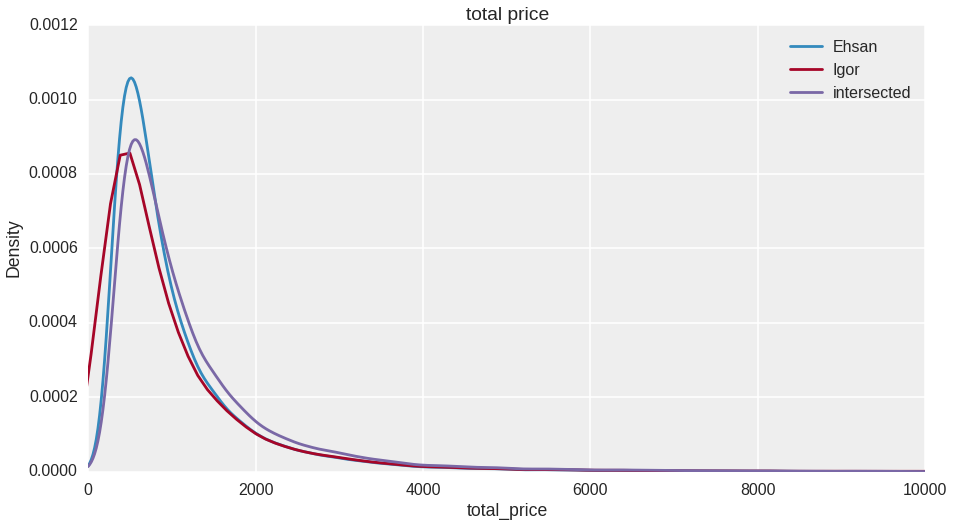

In [34]:
sns.set_context("poster")
plt.figure(figsize=(15,8))

Ehsan =test_data_Ehsan['total_price']
Igor =test_data_Igor['total_price']
intersected =test_data_intersected['total_price']

Ehsan.plot(kind='kde',xlim=(0,10000),legend=True,label='Ehsan')
Igor.plot(kind='kde',xlim=(0,10000),legend=True,label='Igor')
intersected.plot(kind='kde',xlim=(0,10000),legend=True,label='intersected')
pl.xlabel('total_price')
pl.title('total price')
pl.legend()

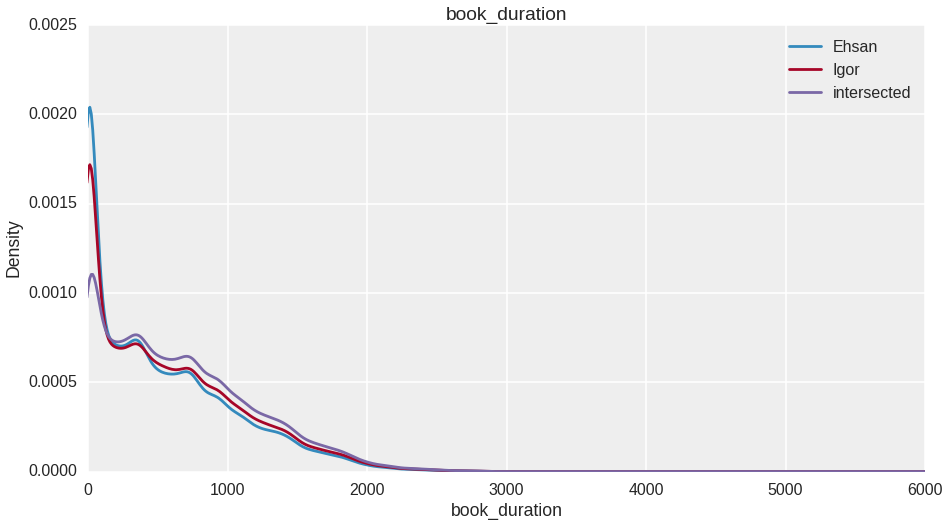

In [35]:
sns.set_context("poster")
plt.figure(figsize=(15,8))

Ehsan =test_data_Ehsan['book_duration']
Igor =test_data_Igor['book_duration']
intersected =test_data_intersected['book_duration']

Ehsan.plot(kind='kde',xlim=(0,6000),legend=True,label='Ehsan')
Igor.plot(kind='kde',xlim=(0,6000),legend=True,label='Igor')
intersected.plot(kind='kde',xlim=(0,6000),legend=True,label='intersected')
pl.xlabel('book_duration')
pl.title('book_duration')
pl.legend()

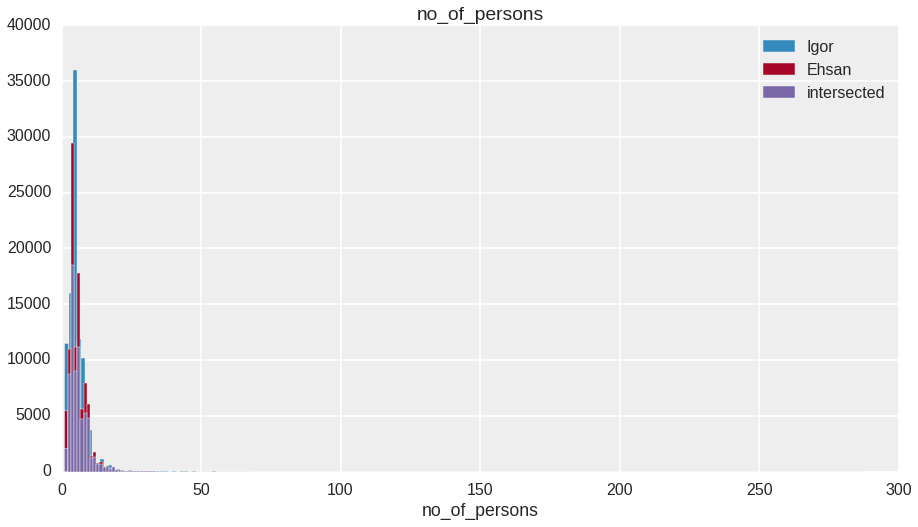

In [36]:
sns.set_context("poster")
plt.figure(figsize=(15,8))

Ehsan =test_data_Ehsan['no_of_persons']
Igor =test_data_Igor['no_of_persons']
intersected =test_data_intersected['no_of_persons']

Igor.hist(label='Igor',bins=200)
Ehsan.hist(label='Ehsan',bins=60)
intersected.hist(label='intersected',bins=60)
#Ehsan.plot(kind='bar',xlim=(0,100),legend=True,label='Ehsan')
#Igor.plot(kind='bar',xlim=(0,100),legend=True,label='Igor')
#intersected.plot(kind='bar',xlim=(0,100),legend=True,label='intersected')

pl.xlabel('no_of_persons')
pl.title('no_of_persons')
pl.legend()

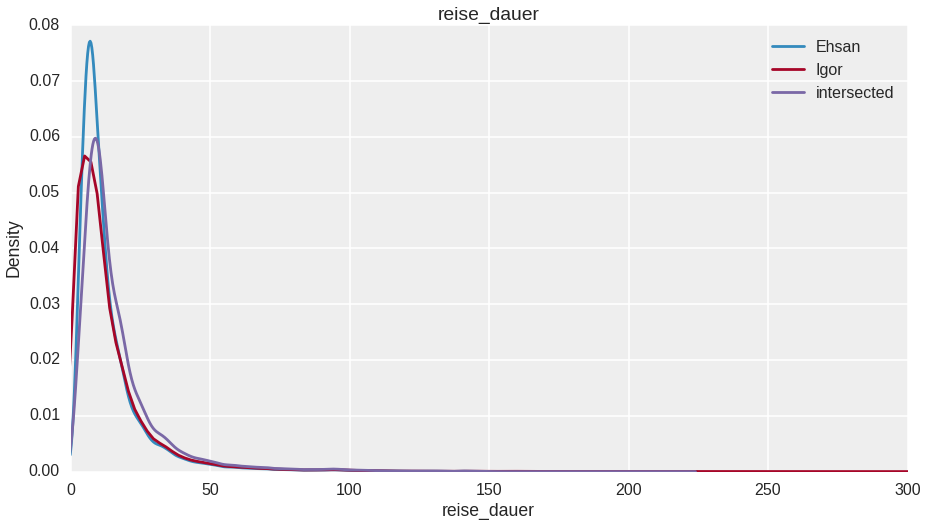

In [37]:
sns.set_context("poster")
plt.figure(figsize=(15,8))

Ehsan =test_data_Ehsan['reise_dauer']
Igor =test_data_Igor['reise_dauer']
intersected =test_data_intersected['reise_dauer']

Ehsan.plot(kind='kde',xlim=(0,300),legend=True,label='Ehsan')
Igor.plot(kind='kde',xlim=(0,300),legend=True,label='Igor')
intersected.plot(kind='kde',xlim=(0,300),legend=True,label='intersected')
pl.xlabel('reise_dauer')
pl.title('reise_dauer')
pl.legend()

# Why so happens?

because I have made the '10%/90%' -quantile preselection of the `Nur_HR_Kunden_150518.csv`



    # 3.2 here is an additional preselection: 
    '''         droping all customers which are outliers:
                who spending lie in the tails of the distributions of 'total_price' -->
                <= 10% or >=90%
                
             Why are we doing that?    
             We think that people, whose 'total_price' is too low at this moment, have bought some products
             occassionaly. It was more likely the first-last buying.
             
             Also people who spent too much money to this moment, perhaps, have 'performed'  all their hollidays planned in
             this year.

    '''


    min_10=df_test.dataset['total_price'].describe(percentiles=[.05,.1,.25,.5,.75,.90,.95])['10%']
    max_90=df_test.dataset['total_price'].describe(percentiles=[.05,.1,.25,.5,.75,.90,.95])['90%']

    criteria_index=df_test.dataset.loc[
    (df_test.dataset['total_price'] < min_10) | 
    (df_test.dataset['total_price'] > max_90) 
    ].index


    outliers=df_test.dataset.loc[criteria_index,:]

#Should we do this or not?